   #### Mawrer Amed Ramirez Martinez ms723737@iteso.mx
   #### Avance de TOG IDI 4

#  Ajuste de Dataset (Adding Multiple Indicators)


In [71]:
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
from datetime import datetime
import seaborn as sns
import pandas as pd
import os, glob

In [72]:
import warnings
warnings.filterwarnings("ignore")

In [73]:
SOURCE_TYPE = "EURUSD_FULL"
FRECUENCIA = "1H"
NUM_FEATURES = 0

In [74]:
pwd = os.getcwd()
datasource_path = os.path.join(pwd, r'../../../../Datasets/Junio2020/procesados/')
filenames = glob.glob(datasource_path + "/*.csv")
filenames.sort()
for file in filenames:
    print(filenames.index(file), ' ',os.path.basename(file))

0   EURUSD_ASK_1H_14F.csv
1   EURUSD_FULL_1D_20F.csv
2   EURUSD_FULL_1D_26F.csv
3   EURUSD_FULL_1H_20F.csv
4   EURUSD_FULL_1H_26F.csv
5   EURUSD_FULL_1M_20F.csv
6   EURUSD_FULL_4H_20F.csv


## Read CSV

### Read Dataset From Regression

In [75]:
if FRECUENCIA =="1D":
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
else:
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
DATASET_FULL = pd.read_csv(filenames[4], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
print(DATASET_FULL)
print(DATASET_FULL.shape)

                  Gmt time     Open     High      Low    Close      Volume  \
0      2004-01-01 00:00:00  1.25950  1.25960  1.25826  1.25910   6654.2002   
1      2004-01-01 01:00:00  1.25958  1.25960  1.25947  1.25951    660.6000   
2      2004-01-01 02:00:00  1.25955  1.25962  1.25944  1.25951   2091.0000   
3      2004-01-01 03:00:00  1.25950  1.25965  1.25834  1.25869  10003.0996   
4      2004-01-01 04:00:00  1.25908  1.25960  1.25843  1.25950   7603.3999   
...                    ...      ...      ...      ...      ...         ...   
102509 2020-05-29 19:00:00  1.10998  1.11070  1.10862  1.10998  12120.8398   
102510 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071   4646.7427   
102511 2020-05-31 21:00:00  1.11213  1.11217  1.11136  1.11141    417.4906   
102512 2020-05-31 22:00:00  1.11138  1.11148  1.11028  1.11123   4549.1167   
102513 2020-05-31 23:00:00  1.11123  1.11199  1.11119  1.11158   5159.8101   

        Open_Bid  High_Bid  Low_Bid  Close_Bid  ...           A

### Add EMA Function

In [76]:
def EMA(df, n):
    EMA = pd.Series(df['Close'].ewm(com=0.5).mean(), name = 'EMA_Close_' + str(n))
    df = df.join(EMA)  
    return df

In [77]:
DATASET_FULL = EMA(DATASET_FULL, 5)
DATASET_FULL

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,AQM_Pct_Range_Close_diff,AQM_Pct_Range_Close,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_100,MA_Close_150,MA_Close_175,MA_Close_200,EMA_Close_5
0,2004-01-01 00:00:00,1.25950,1.25960,1.25826,1.25910,6654.2002,1.25934,1.25948,1.25814,1.25900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.259100
1,2004-01-01 01:00:00,1.25958,1.25960,1.25947,1.25951,660.6000,1.25942,1.25948,1.25934,1.25941,...,0.000326,0.000326,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.259407
2,2004-01-01 02:00:00,1.25955,1.25962,1.25944,1.25951,2091.0000,1.25945,1.25948,1.25927,1.25936,...,0.000000,0.000326,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.259478
3,2004-01-01 03:00:00,1.25950,1.25965,1.25834,1.25869,10003.0996,1.25934,1.25953,1.25821,1.25854,...,-0.000651,-0.000325,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.258946
4,2004-01-01 04:00:00,1.25908,1.25960,1.25843,1.25950,7603.3999,1.25898,1.25948,1.25829,1.25940,...,0.000644,0.000318,1.259262,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.259317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102509,2020-05-29 19:00:00,1.10998,1.11070,1.10862,1.10998,12120.8398,1.10995,1.11066,1.10859,1.10997,...,0.000009,-0.049955,1.109920,1.110070,1.106276,1.100885,1.097692,1.097675,1.097224,1.109928
102510,2020-05-29 20:00:00,1.10997,1.11094,1.10982,1.11071,4646.7427,1.10993,1.11085,1.10979,1.11036,...,0.000658,-0.049297,1.109922,1.110212,1.106510,1.101099,1.097804,1.097747,1.097302,1.110449
102511,2020-05-31 21:00:00,1.11213,1.11217,1.11136,1.11141,417.4906,1.11129,1.11194,1.11123,1.11130,...,0.000630,-0.048667,1.110242,1.110356,1.106743,1.101315,1.097912,1.097817,1.097392,1.111090
102512,2020-05-31 22:00:00,1.11138,1.11148,1.11028,1.11123,4549.1167,1.11130,1.11144,1.11023,1.11118,...,-0.000162,-0.048829,1.110660,1.110488,1.106952,1.101529,1.098017,1.097893,1.097474,1.111183


In [78]:
DATASET_FULL['EMA_Close_5'].describe()

count    102514.000000
mean          1.264048
std           0.122824
min           1.036483
25%           1.149928
50%           1.270629
75%           1.350856
max           1.600537
Name: EMA_Close_5, dtype: float64

In [79]:
DATASET_FULL['EMA_Close_5'].isnull().sum()

0

(102514, 27)


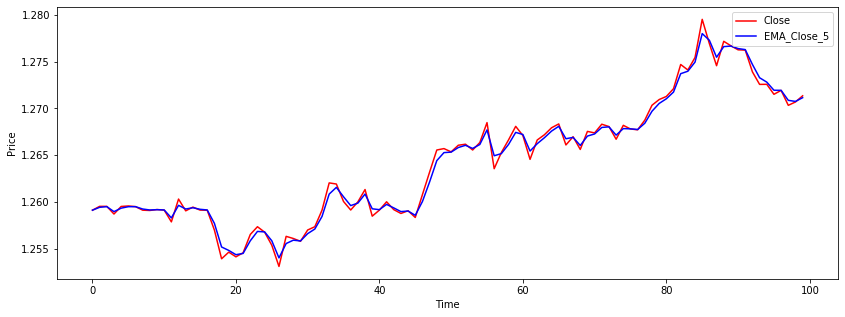

In [80]:
INICIO = 0
FIN = 100
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['EMA_Close_5'][INICIO:FIN], color = 'blue', label = 'EMA_Close_5')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

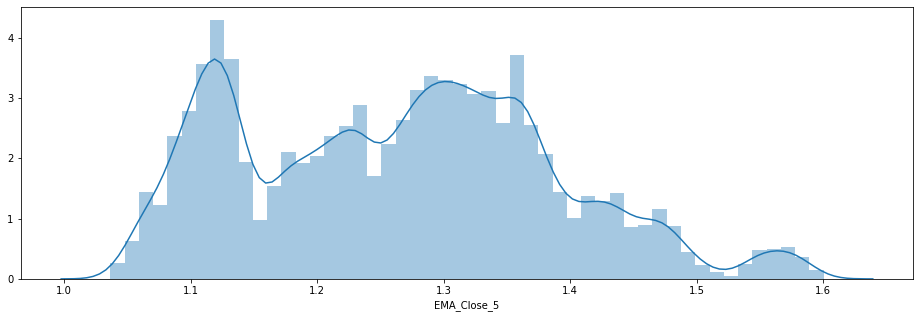

In [81]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['EMA_Close_5']);

### MOM Function

In [82]:
#Momentum  
def MOM(df, n):  
    M = pd.Series(df['Close'].diff(n), name = 'Momentum_' + str(n))  
    df = df.join(M)  
    return df

In [83]:
DATASET_FULL = MOM(DATASET_FULL, 1)
DATASET_FULL = MOM(DATASET_FULL, 2)
DATASET_FULL = MOM(DATASET_FULL, 3)
DATASET_FULL = MOM(DATASET_FULL, 4)
DATASET_FULL = MOM(DATASET_FULL, 5)
DATASET_FULL = MOM(DATASET_FULL, 6)
DATASET_FULL = MOM(DATASET_FULL, 7)
DATASET_FULL = MOM(DATASET_FULL, 8)
DATASET_FULL = MOM(DATASET_FULL, 9)
DATASET_FULL = MOM(DATASET_FULL, 10)
DATASET_FULL = MOM(DATASET_FULL, 11)
DATASET_FULL = MOM(DATASET_FULL, 12)
DATASET_FULL = MOM(DATASET_FULL, 13)
DATASET_FULL = MOM(DATASET_FULL, 14)
DATASET_FULL = MOM(DATASET_FULL, 15)
DATASET_FULL = MOM(DATASET_FULL, 25)
DATASET_FULL = MOM(DATASET_FULL, 36)
DATASET_FULL = MOM(DATASET_FULL, 50)
DATASET_FULL = MOM(DATASET_FULL, 75)
DATASET_FULL = MOM(DATASET_FULL, 80)
DATASET_FULL = MOM(DATASET_FULL, 100)
print(DATASET_FULL)

                  Gmt time     Open     High      Low    Close      Volume  \
0      2004-01-01 00:00:00  1.25950  1.25960  1.25826  1.25910   6654.2002   
1      2004-01-01 01:00:00  1.25958  1.25960  1.25947  1.25951    660.6000   
2      2004-01-01 02:00:00  1.25955  1.25962  1.25944  1.25951   2091.0000   
3      2004-01-01 03:00:00  1.25950  1.25965  1.25834  1.25869  10003.0996   
4      2004-01-01 04:00:00  1.25908  1.25960  1.25843  1.25950   7603.3999   
...                    ...      ...      ...      ...      ...         ...   
102509 2020-05-29 19:00:00  1.10998  1.11070  1.10862  1.10998  12120.8398   
102510 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071   4646.7427   
102511 2020-05-31 21:00:00  1.11213  1.11217  1.11136  1.11141    417.4906   
102512 2020-05-31 22:00:00  1.11138  1.11148  1.11028  1.11123   4549.1167   
102513 2020-05-31 23:00:00  1.11123  1.11199  1.11119  1.11158   5159.8101   

        Open_Bid  High_Bid  Low_Bid  Close_Bid  ...  Momentum_1

In [84]:
print(DATASET_FULL['Momentum_5'].describe())
print(DATASET_FULL['Momentum_5'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Momentum_5'].isnull().sum())

count    102509.000000
mean         -0.000007
std           0.003464
min          -0.040300
25%          -0.001440
50%           0.000000
75%           0.001450
max           0.038150
Name: Momentum_5, dtype: float64
5
0


In [85]:
print(DATASET_FULL['Momentum_100'].isnull().sum())

0


(102514, 48)


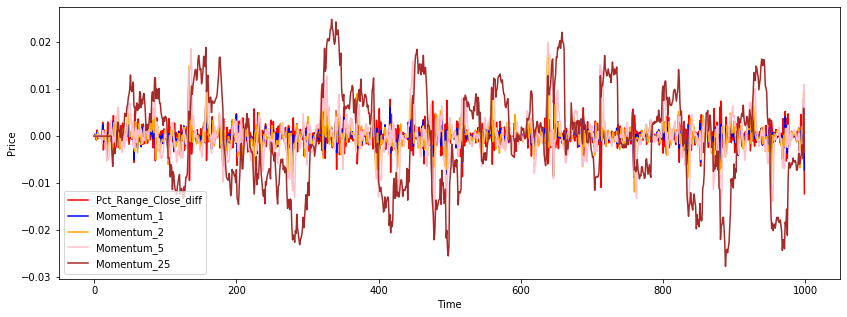

In [86]:
INICIO = 0
FIN = 1000
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Pct_Range_Close_diff'][INICIO:FIN], color = 'red', label = 'Pct_Range_Close_diff')
pyplot.plot(DATASET_FULL['Momentum_1'][INICIO:FIN], color = 'blue', label = 'Momentum_1')
pyplot.plot(DATASET_FULL['Momentum_2'][INICIO:FIN], color = 'orange', label = 'Momentum_2')
pyplot.plot(DATASET_FULL['Momentum_5'][INICIO:FIN], color = 'pink', label = 'Momentum_5')
pyplot.plot(DATASET_FULL['Momentum_25'][INICIO:FIN], color = 'brown', label = 'Momentum_25')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

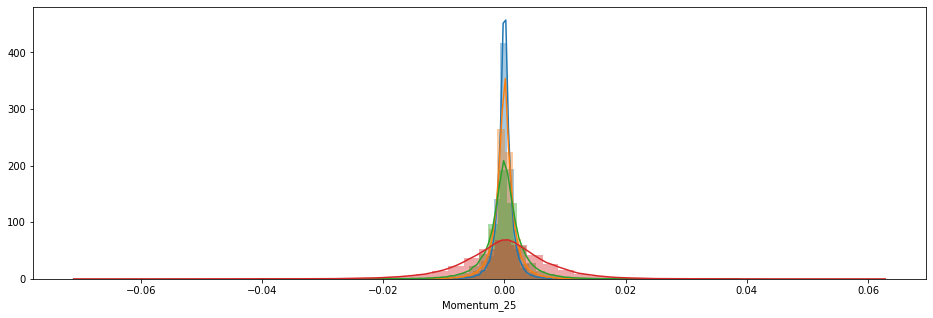

In [87]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['Momentum_1']);
sns.distplot(DATASET_FULL['Momentum_2']);
sns.distplot(DATASET_FULL['Momentum_5']);
sns.distplot(DATASET_FULL['Momentum_25']);


In [88]:
def get_rsi(df, n=14):
    deltas = (df['Close']-df['Close'].shift(1)).fillna(0)

    avg_of_gains = deltas[1:n+1][deltas > 0].sum() / n
    avg_of_losses = -deltas[1:n+1][deltas < 0].sum() / n

    # Set up pd.Series container for RSI values
    rsi_series = pd.Series(0.0, deltas.index)

    # Now calculate RSI using the Wilder smoothing method, starting with n+1 delta.
    up = lambda x: x if x > 0 else 0
    down = lambda x: -x if x < 0 else 0
    i = n+1
    for d in deltas[n+1:]:
        avg_of_gains = ((avg_of_gains * (n-1)) + up(d)) / n
        avg_of_losses = ((avg_of_losses * (n-1)) + down(d)) / n
        if avg_of_losses != 0:
            rs = avg_of_gains / avg_of_losses
            rsi_series[i] = 100 - (100 / (1 + rs))
        else:
            rsi_series[i] = 100
        i += 1
    df['rsi'+'_'+str(n)] = rsi_series /100
    return df

In [89]:
DATASET_FULL = get_rsi(DATASET_FULL, 5)

In [90]:
DATASET_FULL = get_rsi(DATASET_FULL, 14)

In [91]:
DATASET_FULL = get_rsi(DATASET_FULL, 25)
DATASET_FULL = get_rsi(DATASET_FULL, 50)
DATASET_FULL = get_rsi(DATASET_FULL, 70)

In [92]:
DATASET_FULL

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,Momentum_36,Momentum_50,Momentum_75,Momentum_80,Momentum_100,rsi_5,rsi_14,rsi_25,rsi_50,rsi_70
0,2004-01-01 00:00:00,1.25950,1.25960,1.25826,1.25910,6654.2002,1.25934,1.25948,1.25814,1.25900,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2004-01-01 01:00:00,1.25958,1.25960,1.25947,1.25951,660.6000,1.25942,1.25948,1.25934,1.25941,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2004-01-01 02:00:00,1.25955,1.25962,1.25944,1.25951,2091.0000,1.25945,1.25948,1.25927,1.25936,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2004-01-01 03:00:00,1.25950,1.25965,1.25834,1.25869,10003.0996,1.25934,1.25953,1.25821,1.25854,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2004-01-01 04:00:00,1.25908,1.25960,1.25843,1.25950,7603.3999,1.25898,1.25948,1.25829,1.25940,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102509,2020-05-29 19:00:00,1.10998,1.11070,1.10862,1.10998,12120.8398,1.10995,1.11066,1.10859,1.10997,...,0.00953,0.01081,0.01232,0.01211,0.02043,0.391286,0.534606,0.587250,0.598598,0.592575
102510,2020-05-29 20:00:00,1.10997,1.11094,1.10982,1.11071,4646.7427,1.10993,1.11085,1.10979,1.11036,...,0.01078,0.01169,0.01278,0.01362,0.02136,0.520001,0.568363,0.603497,0.606410,0.598298
102511,2020-05-31 21:00:00,1.11213,1.11217,1.11136,1.11141,417.4906,1.11129,1.11194,1.11123,1.11130,...,0.01041,0.01166,0.01201,0.01344,0.02161,0.617060,0.598441,0.618498,0.613765,0.603714
102512,2020-05-31 22:00:00,1.11138,1.11148,1.11028,1.11123,4549.1167,1.11130,1.11144,1.11023,1.11118,...,0.01048,0.01045,0.01304,0.01254,0.02137,0.579402,0.587111,0.612293,0.610770,0.601598


(102514, 53)


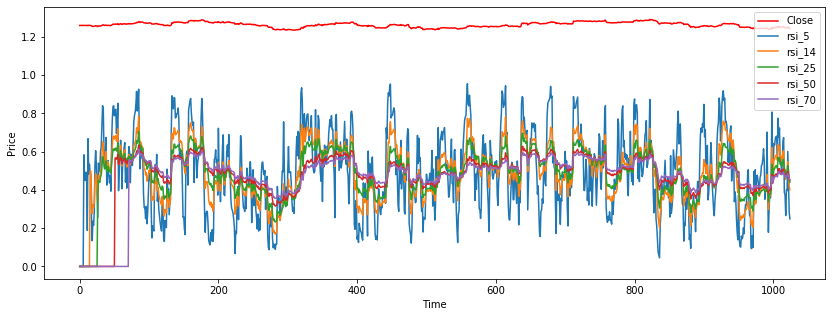

In [93]:
INICIO = 0
FIN = 1025
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['rsi_5'][INICIO:FIN], label = 'rsi_5')
pyplot.plot(DATASET_FULL['rsi_14'][INICIO:FIN], label = 'rsi_14')
pyplot.plot(DATASET_FULL['rsi_25'][INICIO:FIN], label = 'rsi_25')
pyplot.plot(DATASET_FULL['rsi_50'][INICIO:FIN], label = 'rsi_50')
pyplot.plot(DATASET_FULL['rsi_70'][INICIO:FIN], label = 'rsi_70')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [94]:
print(DATASET_FULL['rsi_5'].describe())
print(DATASET_FULL['rsi_5'].isnull().sum())
DATASET_FULL.fillna(method='backfill', inplace=True)
print(DATASET_FULL['rsi_5'].isnull().sum())

count    102514.000000
mean          0.500300
std           0.197623
min           0.000000
25%           0.355411
50%           0.501599
75%           0.645809
max           0.996771
Name: rsi_5, dtype: float64
0
0


In [95]:
#Bollinger Bands  
def BBANDS(df, n):  
    no_of_std = 1.5
    MA = pd.Series(pd.Series(df['Close'].rolling(n).mean()))  
    MSD = pd.Series(pd.Series(df['Close'].rolling(n).std()))  
    
    
    df['Rolling_Mean'+ str(n)] = MA
    df['Bollinger_High'] = MA + (MSD * no_of_std)
    df['Bollinger_Low'] = MA - (MSD * no_of_std)
    
    return df

In [96]:
DATASET_FULL = BBANDS(DATASET_FULL, 25)
#DATASET_FULL = BBANDS(DATASET_FULL, 25)
print(DATASET_FULL.tail(5))

                  Gmt time     Open     High      Low    Close      Volume  \
102509 2020-05-29 19:00:00  1.10998  1.11070  1.10862  1.10998  12120.8398   
102510 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071   4646.7427   
102511 2020-05-31 21:00:00  1.11213  1.11217  1.11136  1.11141    417.4906   
102512 2020-05-31 22:00:00  1.11138  1.11148  1.11028  1.11123   4549.1167   
102513 2020-05-31 23:00:00  1.11123  1.11199  1.11119  1.11158   5159.8101   

        Open_Bid  High_Bid  Low_Bid  Close_Bid  ...  Momentum_80  \
102509   1.10995   1.11066  1.10859    1.10997  ...      0.01211   
102510   1.10993   1.11085  1.10979    1.11036  ...      0.01362   
102511   1.11129   1.11194  1.11123    1.11130  ...      0.01344   
102512   1.11130   1.11144  1.11023    1.11118  ...      0.01254   
102513   1.11119   1.11195  1.11113    1.11156  ...      0.01463   

        Momentum_100     rsi_5    rsi_14    rsi_25    rsi_50    rsi_70  \
102509       0.02043  0.391286  0.534606  0.5872

In [97]:
print(DATASET_FULL['Rolling_Mean25'].describe())
print(DATASET_FULL['Rolling_Mean25'].isnull().sum())
DATASET_FULL.fillna(method='backfill', inplace=True)
print(DATASET_FULL['Rolling_Mean25'].isnull().sum())

count    102490.000000
mean          1.264066
std           0.122791
min           1.038964
25%           1.149779
50%           1.270798
75%           1.350949
max           1.597393
Name: Rolling_Mean25, dtype: float64
24
0


In [98]:
print(DATASET_FULL['Bollinger_High'].describe())
print(DATASET_FULL['Bollinger_High'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Bollinger_High'].isnull().sum())

count    102514.000000
mean          1.268029
std           0.123436
min           1.040885
25%           1.153417
50%           1.274883
75%           1.354406
max           1.602564
Name: Bollinger_High, dtype: float64
0
0


In [99]:
print(DATASET_FULL['Bollinger_Low'].describe())
print(DATASET_FULL['Bollinger_Low'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Bollinger_Low'].isnull().sum())

count    102514.000000
mean          1.260099
std           0.122176
min           1.036625
25%           1.146186
50%           1.266600
75%           1.346729
max           1.594183
Name: Bollinger_Low, dtype: float64
0
0


(102514, 56)


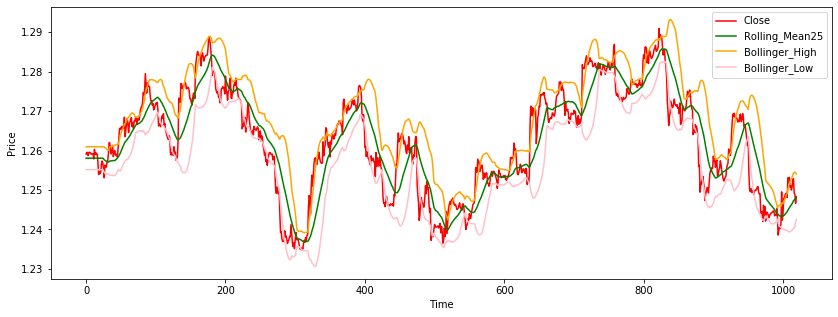

In [100]:
INICIO = 0
FIN = 1020
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['Rolling_Mean25'][INICIO:FIN], color = 'green', label = 'Rolling_Mean25')
pyplot.plot(DATASET_FULL['Bollinger_High'][INICIO:FIN], color = 'orange', label = 'Bollinger_High')
pyplot.plot(DATASET_FULL['Bollinger_Low'][INICIO:FIN], color = 'pink', label = 'Bollinger_Low')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

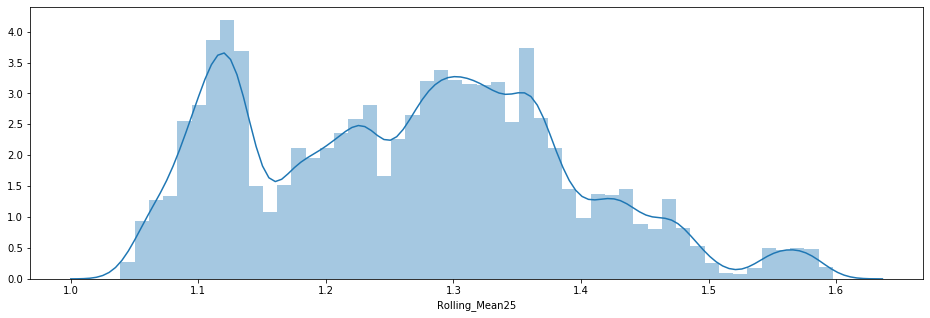

In [101]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['Rolling_Mean25']);

In [102]:
#Stochastic oscillator %K  
def STOK(df):  
    SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name = 'SO_k')  
    df = df.join(SOk)  
    return df

In [103]:
DATASET_FULL = STOK(DATASET_FULL)
print(DATASET_FULL.tail(5))

                  Gmt time     Open     High      Low    Close      Volume  \
102509 2020-05-29 19:00:00  1.10998  1.11070  1.10862  1.10998  12120.8398   
102510 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071   4646.7427   
102511 2020-05-31 21:00:00  1.11213  1.11217  1.11136  1.11141    417.4906   
102512 2020-05-31 22:00:00  1.11138  1.11148  1.11028  1.11123   4549.1167   
102513 2020-05-31 23:00:00  1.11123  1.11199  1.11119  1.11158   5159.8101   

        Open_Bid  High_Bid  Low_Bid  Close_Bid  ...  Momentum_100     rsi_5  \
102509   1.10995   1.11066  1.10859    1.10997  ...       0.02043  0.391286   
102510   1.10993   1.11085  1.10979    1.11036  ...       0.02136  0.520001   
102511   1.11129   1.11194  1.11123    1.11130  ...       0.02161  0.617060   
102512   1.11130   1.11144  1.11023    1.11118  ...       0.02137  0.579402   
102513   1.11119   1.11195  1.11113    1.11156  ...       0.02191  0.633731   

          rsi_14    rsi_25    rsi_50    rsi_70  Rolling_

In [104]:
print(DATASET_FULL['SO_k'].describe())
print(DATASET_FULL['SO_k'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['SO_k'].isnull().sum())

count    102513.000000
mean          0.501679
std           0.284807
min           0.000000
25%           0.257143
50%           0.503106
75%           0.747475
max           1.000000
Name: SO_k, dtype: float64
1
0


(102514, 57)


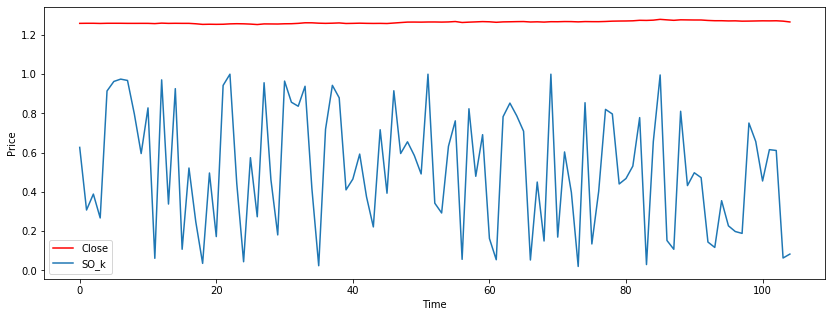

In [105]:
INICIO = 0
FIN = 105
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['SO_k'][INICIO:FIN], label = 'SO_k')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

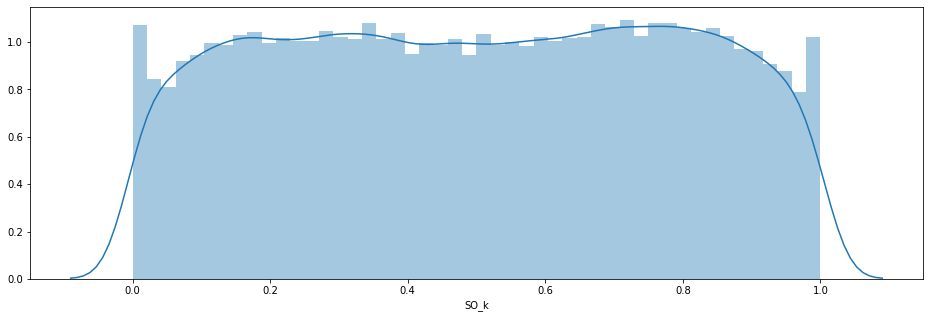

In [106]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['SO_k']);

In [107]:
# Stochastic Oscillator, EMA smoothing, nS = slowing (1 if no slowing)  
def STO(df,  nK, nD, nS=1):  
    SOk = pd.Series((df['Close'] - df['Low'].rolling(nK).min()) / (df['High'].rolling(nK).max() - df['Low'].rolling(nK).min()), name = 'SO%k'+str(nK))  
    SOd = pd.Series(SOk.ewm(ignore_na=False, span=nD, min_periods=nD-1, adjust=True).mean(), name = 'SO%d'+str(nD))  
    SOk = SOk.ewm(ignore_na=False, span=nS, min_periods=nS-1, adjust=True).mean()  
    SOd = SOd.ewm(ignore_na=False, span=nS, min_periods=nS-1, adjust=True).mean()  
    df = df.join(SOk)  
    df = df.join(SOd)  
    return df  

In [108]:
DATASET_FULL = STO(DATASET_FULL,1,2)
print(DATASET_FULL.tail(5))

                  Gmt time     Open     High      Low    Close      Volume  \
102509 2020-05-29 19:00:00  1.10998  1.11070  1.10862  1.10998  12120.8398   
102510 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071   4646.7427   
102511 2020-05-31 21:00:00  1.11213  1.11217  1.11136  1.11141    417.4906   
102512 2020-05-31 22:00:00  1.11138  1.11148  1.11028  1.11123   4549.1167   
102513 2020-05-31 23:00:00  1.11123  1.11199  1.11119  1.11158   5159.8101   

        Open_Bid  High_Bid  Low_Bid  Close_Bid  ...    rsi_14    rsi_25  \
102509   1.10995   1.11066  1.10859    1.10997  ...  0.534606  0.587250   
102510   1.10993   1.11085  1.10979    1.11036  ...  0.568363  0.603497   
102511   1.11129   1.11194  1.11123    1.11130  ...  0.598441  0.618498   
102512   1.11130   1.11144  1.11023    1.11118  ...  0.587111  0.612293   
102513   1.11119   1.11195  1.11113    1.11156  ...  0.602855  0.620014   

          rsi_50    rsi_70  Rolling_Mean25  Bollinger_High  Bollinger_Low  \
102

In [109]:
print(DATASET_FULL['SO%k1'].describe())
print(DATASET_FULL['SO%k1'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['SO%k1'].isnull().sum())

print(DATASET_FULL['SO%d2'].describe())
print(DATASET_FULL['SO%d2'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['SO%d2'].isnull().sum())

count    102514.000000
mean          0.501680
std           0.284806
min           0.000000
25%           0.257143
50%           0.503106
75%           0.747475
max           1.000000
Name: SO%k1, dtype: float64
0
0
count    102514.000000
mean          0.501680
std           0.197337
min           0.012589
25%           0.341962
50%           0.503158
75%           0.663001
max           0.989202
Name: SO%d2, dtype: float64
0
0


(102514, 59)


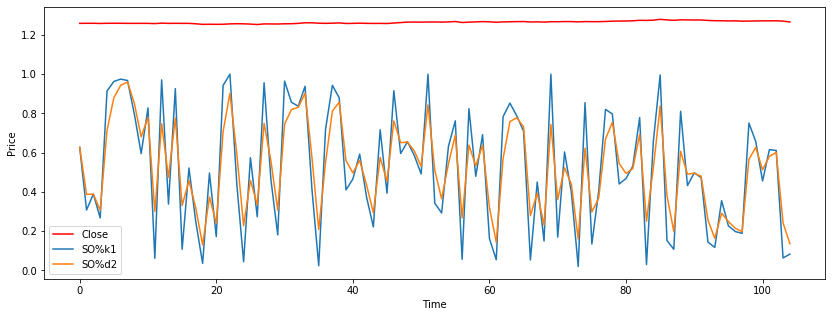

In [110]:
INICIO = 0
FIN = 105
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['SO%k1'][INICIO:FIN], label = 'SO%k1')
pyplot.plot(DATASET_FULL['SO%d2'][INICIO:FIN], label = 'SO%d2')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

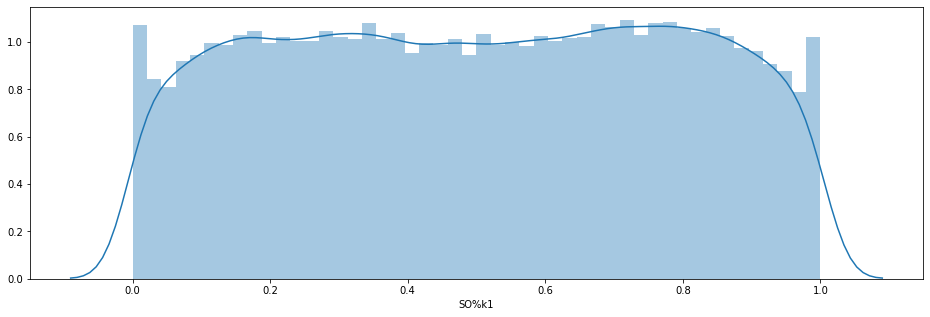

In [111]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['SO%k1']);

In [112]:
#Trix  
def TRIX(df, n):  
    EX1 = df['Close'].ewm(span = n, min_periods = n - 1).mean()
    EX2 = EX1.ewm(span = n, min_periods = n - 1).mean()  
    EX3 = EX2.ewm(span = n, min_periods = n - 1).mean()  
    i = 0  
    ROC_l = [0]  
    while i + 1 <= df.index[-1]:  
        ROC = (EX3[i + 1] - EX3[i]) / EX3[i]  
        ROC_l.append(ROC)  
        i = i + 1  
    Trix = pd.Series(ROC_l, name = 'Trix_' + str(n))  
    df = df.join(Trix)  
    return df

In [113]:
DATASET_FULL = TRIX(DATASET_FULL,2)
DATASET_FULL = TRIX(DATASET_FULL,5)
DATASET_FULL = TRIX(DATASET_FULL,15)
DATASET_FULL = TRIX(DATASET_FULL,25)
DATASET_FULL = TRIX(DATASET_FULL,50)
DATASET_FULL = TRIX(DATASET_FULL,75)
print(DATASET_FULL.tail(5))

                  Gmt time     Open     High      Low    Close      Volume  \
102509 2020-05-29 19:00:00  1.10998  1.11070  1.10862  1.10998  12120.8398   
102510 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071   4646.7427   
102511 2020-05-31 21:00:00  1.11213  1.11217  1.11136  1.11141    417.4906   
102512 2020-05-31 22:00:00  1.11138  1.11148  1.11028  1.11123   4549.1167   
102513 2020-05-31 23:00:00  1.11123  1.11199  1.11119  1.11158   5159.8101   

        Open_Bid  High_Bid  Low_Bid  Close_Bid  ...  Bollinger_Low      SO_k  \
102509   1.10995   1.11066  1.10859    1.10997  ...       1.107085  0.653846   
102510   1.10993   1.11085  1.10979    1.11036  ...       1.107366  0.794643   
102511   1.11129   1.11194  1.11123    1.11130  ...       1.107590  0.061728   
102512   1.11130   1.11144  1.11023    1.11118  ...       1.107819  0.791667   
102513   1.11119   1.11195  1.11113    1.11156  ...       1.108148  0.487500   

           SO%k1     SO%d2    Trix_2    Trix_5   T

In [114]:
print(DATASET_FULL['Trix_5'].describe())
print(DATASET_FULL['Trix_5'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Trix_5'].isnull().sum())

count    102505.000000
mean         -0.000001
std           0.000335
min          -0.003704
25%          -0.000155
50%           0.000002
75%           0.000156
max           0.003414
Name: Trix_5, dtype: float64
9
0


(102514, 65)


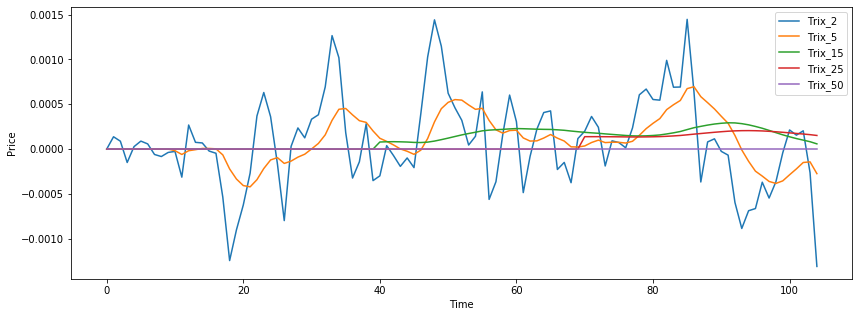

In [115]:
INICIO = 0
FIN = 105
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
#pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['Trix_2'][INICIO:FIN], label = 'Trix_2')
pyplot.plot(DATASET_FULL['Trix_5'][INICIO:FIN], label = 'Trix_5')
pyplot.plot(DATASET_FULL['Trix_15'][INICIO:FIN], label = 'Trix_15')
pyplot.plot(DATASET_FULL['Trix_25'][INICIO:FIN], label = 'Trix_25')
pyplot.plot(DATASET_FULL['Trix_50'][INICIO:FIN], label = 'Trix_50')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

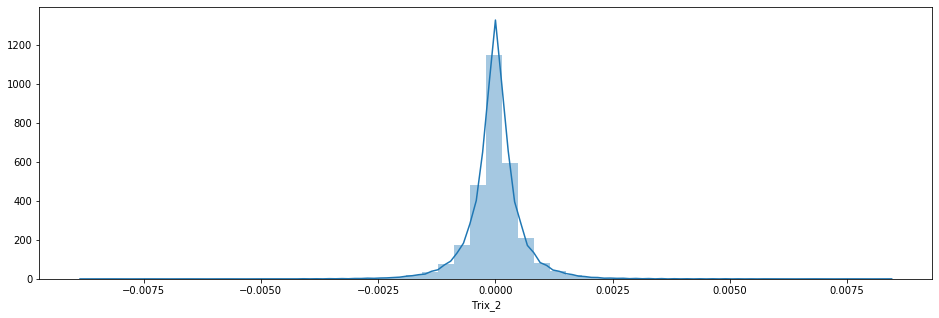

In [116]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['Trix_2']);

In [117]:
#MACD, MACD Signal and MACD difference  
def MACD(df, n_fast, n_slow):  
    EMAfast = pd.Series(df['Close'].ewm(span = n_fast, min_periods = n_slow-1).mean())
    EMAslow = pd.Series(df['Close'].ewm(span = n_slow, min_periods = n_fast-1).mean())
    MACD = pd.Series(EMAfast - EMAslow, name = 'MACD_' + str(n_fast) + '_' + str(n_slow))  
    MACDsign = pd.Series(MACD.ewm(span = 9, min_periods = 8).mean(), name = 'MACDsign_' + str(n_fast) + '_' + str(n_slow))  
    MACDdiff = pd.Series(MACD - MACDsign, name = 'MACDdiff_' + str(n_fast) + '_' + str(n_slow))  
    df = df.join(MACD)  
    df = df.join(MACDsign)  
    df = df.join(MACDdiff)  
    return df

In [118]:
DATASET_FULL = MACD(DATASET_FULL,5,25)
print(DATASET_FULL.tail(5))

                  Gmt time     Open     High      Low    Close      Volume  \
102509 2020-05-29 19:00:00  1.10998  1.11070  1.10862  1.10998  12120.8398   
102510 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071   4646.7427   
102511 2020-05-31 21:00:00  1.11213  1.11217  1.11136  1.11141    417.4906   
102512 2020-05-31 22:00:00  1.11138  1.11148  1.11028  1.11123   4549.1167   
102513 2020-05-31 23:00:00  1.11123  1.11199  1.11119  1.11158   5159.8101   

        Open_Bid  High_Bid  Low_Bid  Close_Bid  ...     SO%d2    Trix_2  \
102509   1.10995   1.11066  1.10859    1.10997  ...  0.698491 -0.000073   
102510   1.10993   1.11085  1.10979    1.11036  ...  0.762592  0.000193   
102511   1.11129   1.11194  1.11123    1.11130  ...  0.295350  0.000393   
102512   1.11130   1.11144  1.11023    1.11118  ...  0.626228  0.000278   
102513   1.11119   1.11195  1.11113    1.11156  ...  0.533743  0.000247   

          Trix_5   Trix_15   Trix_25   Trix_50   Trix_75  MACD_5_25  \
102509 -0

In [119]:
print(DATASET_FULL['MACD_5_25'].describe())
print(DATASET_FULL['MACD_5_25'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['MACD_5_25'].isnull().sum())



count    102491.000000
mean         -0.000014
std           0.002839
min          -0.020185
25%          -0.001442
50%           0.000025
75%           0.001464
max           0.024277
Name: MACD_5_25, dtype: float64
23
0


(102514, 68)


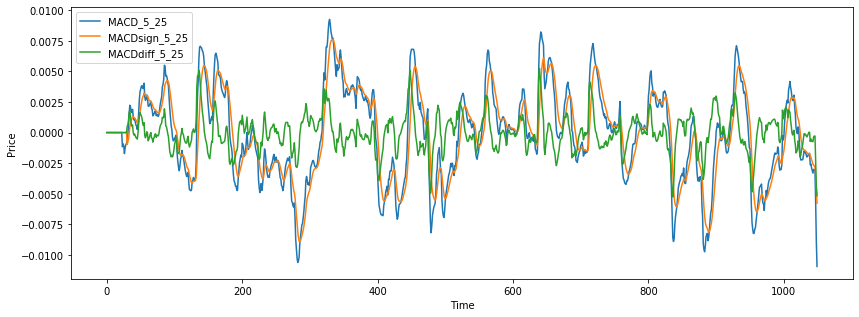

In [120]:
INICIO = 0
FIN = 1050
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
#pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['MACD_5_25'][INICIO:FIN], label = 'MACD_5_25')
pyplot.plot(DATASET_FULL['MACDsign_5_25'][INICIO:FIN], label = 'MACDsign_5_25')
pyplot.plot(DATASET_FULL['MACDdiff_5_25'][INICIO:FIN], label = 'MACDdiff_5_25')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

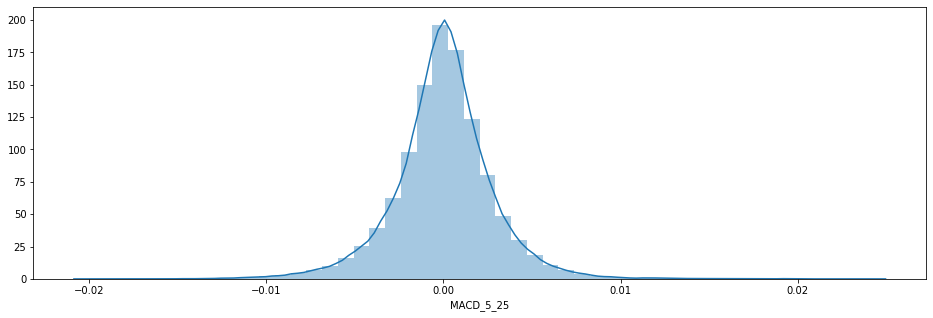

In [121]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['MACD_5_25']);

In [122]:
#Mass Index  
def MassI(df, period = 25, min_periods = 8, span=9):  
    Range = df['High'] - df['Low']  
    EX1 = Range.ewm(span = 9, min_periods = 8).mean()
    EX2 = EX1.ewm(span = 9, min_periods = 8).mean()
    Mass = EX1 / EX2  
    MassI = pd.Series(Mass.rolling(period).sum(),name = 'Mass_Index_'+str(period)+'_'+str(min_periods)+'_'+str(span))  
    df = df.join(MassI)  
    return df

In [123]:
DATASET_FULL = MassI(DATASET_FULL,25,8,9)
print(DATASET_FULL.tail(5))

                  Gmt time     Open     High      Low    Close      Volume  \
102509 2020-05-29 19:00:00  1.10998  1.11070  1.10862  1.10998  12120.8398   
102510 2020-05-29 20:00:00  1.10997  1.11094  1.10982  1.11071   4646.7427   
102511 2020-05-31 21:00:00  1.11213  1.11217  1.11136  1.11141    417.4906   
102512 2020-05-31 22:00:00  1.11138  1.11148  1.11028  1.11123   4549.1167   
102513 2020-05-31 23:00:00  1.11123  1.11199  1.11119  1.11158   5159.8101   

        Open_Bid  High_Bid  Low_Bid  Close_Bid  ...    Trix_2    Trix_5  \
102509   1.10995   1.11066  1.10859    1.10997  ... -0.000073 -0.000202   
102510   1.10993   1.11085  1.10979    1.11036  ...  0.000193 -0.000172   
102511   1.11129   1.11194  1.11123    1.11130  ...  0.000393 -0.000105   
102512   1.11130   1.11144  1.11023    1.11118  ...  0.000278 -0.000047   
102513   1.11119   1.11195  1.11113    1.11156  ...  0.000247  0.000007   

         Trix_15   Trix_25   Trix_50   Trix_75  MACD_5_25  MACDsign_5_25  \
1025

In [124]:
print(DATASET_FULL['Mass_Index_25_8_9'].describe())
print(DATASET_FULL['Mass_Index_25_8_9'].isnull().sum())
DATASET_FULL.fillna(method='backfill', inplace=True)
#DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Mass_Index_25_8_9'].isnull().sum())

count    102476.000000
mean         24.894148
std           0.997007
min          13.667327
25%          24.313442
50%          24.883983
75%          25.456946
max          36.640975
Name: Mass_Index_25_8_9, dtype: float64
38
0


(102514, 69)


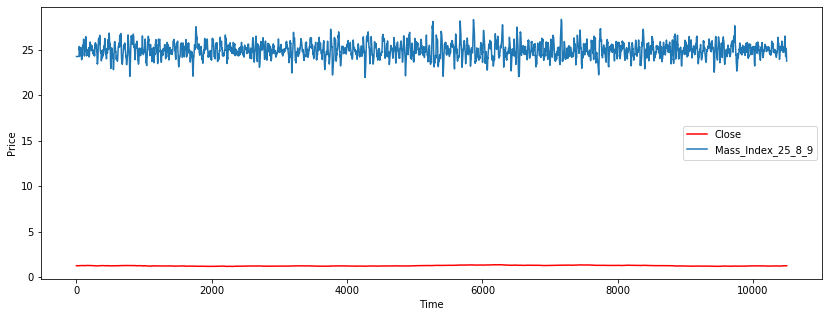

In [125]:
INICIO = 0
FIN = 10500
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['Mass_Index_25_8_9'][INICIO:FIN], label = 'Mass_Index_25_8_9')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

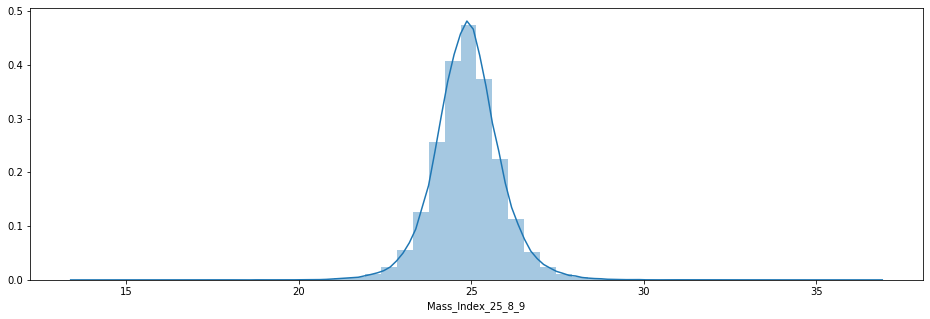

In [126]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['Mass_Index_25_8_9']);

In [127]:
DATASET_FULL.shape

(102514, 69)

In [128]:
# https://github.com/bukosabino/ta/blob/master/examples_to_use/all_features_example.py
#import ta
#DATASET_FULL = ta.add_all_ta_features(DATASET_FULL, "Open", "High", "Low", "Close", "Volume", fillna=True)



In [129]:
DATASET_FULL.shape

(102514, 69)

In [130]:
DATASET_FULL

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,Trix_2,Trix_5,Trix_15,Trix_25,Trix_50,Trix_75,MACD_5_25,MACDsign_5_25,MACDdiff_5_25,Mass_Index_25_8_9
0,2004-01-01 00:00:00,1.25950,1.25960,1.25826,1.25910,6654.2002,1.25934,1.25948,1.25814,1.25900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.237076
1,2004-01-01 01:00:00,1.25958,1.25960,1.25947,1.25951,660.6000,1.25942,1.25948,1.25934,1.25941,...,0.000137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.237076
2,2004-01-01 02:00:00,1.25955,1.25962,1.25944,1.25951,2091.0000,1.25945,1.25948,1.25927,1.25936,...,0.000088,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.237076
3,2004-01-01 03:00:00,1.25950,1.25965,1.25834,1.25869,10003.0996,1.25934,1.25953,1.25821,1.25854,...,-0.000150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.237076
4,2004-01-01 04:00:00,1.25908,1.25960,1.25843,1.25950,7603.3999,1.25898,1.25948,1.25829,1.25940,...,0.000027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.237076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102509,2020-05-29 19:00:00,1.10998,1.11070,1.10862,1.10998,12120.8398,1.10995,1.11066,1.10859,1.10997,...,-0.000073,-0.000202,0.000236,0.000237,0.000147,0.000093,0.000658,0.001882,-0.001224,25.246677
102510,2020-05-29 20:00:00,1.10997,1.11094,1.10982,1.11071,4646.7427,1.10993,1.11085,1.10979,1.11036,...,0.000193,-0.000172,0.000219,0.000233,0.000149,0.000094,0.000735,0.001653,-0.000918,25.191516
102511,2020-05-31 21:00:00,1.11213,1.11217,1.11136,1.11141,417.4906,1.11129,1.11194,1.11123,1.11130,...,0.000393,-0.000105,0.000204,0.000229,0.000150,0.000096,0.000943,0.001511,-0.000568,25.140431
102512,2020-05-31 22:00:00,1.11138,1.11148,1.11028,1.11123,4549.1167,1.11130,1.11144,1.11023,1.11118,...,0.000278,-0.000047,0.000190,0.000225,0.000152,0.000097,0.001000,0.001409,-0.000408,25.118420


### Save CSV File 'DF_EURUSD_ASK_1H_PROC.csv'

In [131]:
#Get the Final number of Features
NUM_FEATURES = str(DATASET_FULL.shape[1])
filename = 'R-' + SOURCE_TYPE + '_' + FRECUENCIA + '_' + NUM_FEATURES + 'F.csv'
print(filename)

R-EURUSD_FULL_1H_69F.csv


In [132]:
DATASET_FULL.columns

Index(['Gmt time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Open_Bid',
       'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 'Spread', 'day_name',
       'weekday', 'Pct_Range_Close', 'Pct_Range_Close_diff', 'AQV',
       'AQM_Pct_Range_Close_diff', 'AQM_Pct_Range_Close', 'MA_Close_5',
       'MA_Close_25', 'MA_Close_50', 'MA_Close_100', 'MA_Close_150',
       'MA_Close_175', 'MA_Close_200', 'EMA_Close_5', 'Momentum_1',
       'Momentum_2', 'Momentum_3', 'Momentum_4', 'Momentum_5', 'Momentum_6',
       'Momentum_7', 'Momentum_8', 'Momentum_9', 'Momentum_10', 'Momentum_11',
       'Momentum_12', 'Momentum_13', 'Momentum_14', 'Momentum_15',
       'Momentum_25', 'Momentum_36', 'Momentum_50', 'Momentum_75',
       'Momentum_80', 'Momentum_100', 'rsi_5', 'rsi_14', 'rsi_25', 'rsi_50',
       'rsi_70', 'Rolling_Mean25', 'Bollinger_High', 'Bollinger_Low', 'SO_k',
       'SO%k1', 'SO%d2', 'Trix_2', 'Trix_5', 'Trix_15', 'Trix_25', 'Trix_50',
       'Trix_75', 'MACD_5_25', 'MACDsign_5_25', 

In [133]:
pwd = os.getcwd()
filename_path = os.path.join(pwd, r'../../../../Datasets/Junio2020/procesados-regression/' + filename)
DATASET_FULL.to_csv(filename_path, header=True, index=False)